# 1. Write a program for pre-processing of a text document such as stop word removal, stemming.

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# Function for Part-of-Speech (POS) tagging
def perform_pos_tagging(text):
    # Tokenize the input text
    words = nltk.word_tokenize(text)
    # Perform POS tagging
    pos_tags = nltk.pos_tag(words)
    return pos_tags

# Function for tokenization
def tokenize_text(text):
    # Tokenize the input text
    words = word_tokenize(text)
    return words

# Function for lemmatization
def lemmatize_text(text):
    # Tokenize the input text
    words = word_tokenize(text)
    # Initialize a WordNet Lemmatizer
    lemmatizer = WordNetLemmatizer()
    # Apply lemmatization to each word
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    # Reconstruct the text with lemmatization
    result_text = ' '.join(lemmatized_words)
    return result_text

# Function for stop word removal
def remove_stopwords(text):
    # Tokenize the input text
    words = word_tokenize(text)
    # Define a list of English stopwords
    stop_words = set(stopwords.words('english'))
    # Remove stop words
    filtered_words = [word for word in words if word.lower() not in stop_words]
    # Reconstruct the text without stop words
    result_text = ' '.join(filtered_words)
    return result_text

# Function for stemming
def perform_stemming(text):
    # Tokenize the input text
    words = word_tokenize(text)
    # Initialize a Porter Stemmer
    stemmer = PorterStemmer()
    # Apply stemming to each word
    stemmed_words = [stemmer.stem(word) for word in words]
    # Reconstruct the text with stemming
    result_text = ' '.join(stemmed_words)
    return result_text

# Input text
input_text = "This is an example of a document for tokenization. This is an example document for POS tagging and stemming."

# Apply stop word removal
stopword_removed_text = remove_stopwords(input_text)

# Apply stemming
stemmed_text = perform_stemming(input_text)

# Tokenize the text
tokenized_text = tokenize_text(input_text)

# Lemmatize the text
lemmatized_text = lemmatize_text(input_text)

# Apply POS tagging
pos_tags_result = perform_pos_tagging(input_text)

# Display the results
print("Original Text:")
print(input_text)

print("\nAfter Stopword Removal:")
print(stopword_removed_text)

print("\nAfter Stemming:")
print(stemmed_text)

print("\nTokenized Text:")
print(tokenized_text)

print("\nLemmatized Text:")
print(lemmatized_text)

print("\nPOS Tagging Results:")
for word, pos_tag in pos_tags_result:
    print(f"{word}: {pos_tag}")


Original Text:
This is an example of a document for tokenization. This is an example document for POS tagging and stemming.

After Stopword Removal:
example document tokenization . example document POS tagging stemming .

After Stemming:
thi is an exampl of a document for token . thi is an exampl document for po tag and stem .

Tokenized Text:
['This', 'is', 'an', 'example', 'of', 'a', 'document', 'for', 'tokenization', '.', 'This', 'is', 'an', 'example', 'document', 'for', 'POS', 'tagging', 'and', 'stemming', '.']

Lemmatized Text:
This is an example of a document for tokenization . This is an example document for POS tagging and stemming .

POS Tagging Results:
This: DT
is: VBZ
an: DT
example: NN
of: IN
a: DT
document: NN
for: IN
tokenization: NN
.: .
This: DT
is: VBZ
an: DT
example: NN
document: NN
for: IN
POS: NNP
tagging: NN
and: CC
stemming: NN
.: .


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# 2. Implement a program for retrieval of documents using inverted files.

In [ ]:
import re
from collections import defaultdict

class InvertedIndex:
    def __init__(self):
        self.index = defaultdict(list)

    def add_document(self, doc_id, content):
        words = re.findall(r'\w+', content.lower())
        for word in words:
            self.index[word].append(doc_id)

    def search(self, query):
        query_terms = query.lower().split()
        if all(term in self.index for term in query_terms):
            result = set(self.index[query_terms[0]])
            for term in query_terms[1:]:
                result.intersection_update(self.index[term])
            return list(result)
        else:
            return []

    def print_term_document_matrix(self, documents):
        print("Term-Document Matrix:")
        for term, doc_ids in self.index.items():
            row = [1 if doc_id in doc_ids else 0 for doc_id in documents.keys()]
            print(f"{term}: {row}")

    def print_inverted_index(self):
        print("Inverted Index:")
        for term, doc_ids in self.index.items():
            print(f"{term}: {doc_ids}")

if __name__ == "__main__":
    # Sample documents
    documents = {
        1: "This is the first document.",
        2: "This document is the second document.",
        3: "And this is the third one.",
        4: "Is this the first document?"
    }

    # Create an inverted index
    index = InvertedIndex()
    for doc_id, content in documents.items():
        index.add_document(doc_id, content)

    # Print Term-Document Matrix and Inverted Index
    index.print_term_document_matrix(documents)
    print("\n-----------------------------------\n")
    index.print_inverted_index()
    print("\n-----------------------------------\n")

    # Perform a search
    query = input("Enter your search query: ")
    results = index.search(query)

    if results:
        print("Matching documents:")
        for doc_id in results:
            print(f"Document {doc_id}: {documents[doc_id]}")
    else:
        print("No matching documents found.")




Term-Document Matrix:
this: [1, 1, 1, 1]
is: [1, 1, 1, 1]
the: [1, 1, 1, 1]
first: [1, 0, 0, 1]
document: [1, 1, 0, 1]
second: [0, 1, 0, 0]
and: [0, 0, 1, 0]
third: [0, 0, 1, 0]
one: [0, 0, 1, 0]

-----------------------------------

Inverted Index:
this: [1, 2, 3, 4]
is: [1, 2, 3, 4]
the: [1, 2, 3, 4]
first: [1, 4]
document: [1, 2, 2, 4]
second: [2]
and: [3]
third: [3]
one: [3]
Enter your search query: first
Matching documents:
Document 1: This is the first document.
Document 4: Is this the first document?


# 3. Write a program to construct a Bayesian network considering medical data. Use this model to demonstrate the diagnosis of heart patients using the standard Heart Disease Data Set (You can use Java/Python ML library classes/API.

In [ ]:
!pip install --upgrade pgmpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 11.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination

###################### DO NOT LOAD THIS DATA LINK DIRECTLY GO ON THIS LINK AND DOWNLOAD THE DATASET
data = pd.read_csv('https://raw.githubusercontent.com/abcxyz-0/prac/main/IR/heart.csv')
###################### DO NOT LOAD THIS DATA LINK DIRECTLY GO ON THIS LINK AND DOWNLOAD THE DATASET


# Define the Bayesian network structure
model = BayesianNetwork([('Age', 'HeartDisease'),
                         ('Sex', 'HeartDisease'),
                         ('ChestPainType', 'HeartDisease'),
                         ('RestingBP', 'HeartDisease'),
                         ('Cholesterol', 'HeartDisease'),
                         ('FastingBS', 'HeartDisease'),
                         ('RestingECG', 'HeartDisease'),
                         ('MaxHR', 'HeartDisease'),
                         ('ExerciseAngina', 'HeartDisease'),
                         ('Oldpeak', 'HeartDisease'),
                         ('ST_Slope', 'HeartDisease')])

# Estimate CPDs from data
model.fit(data, estimator=MaximumLikelihoodEstimator)

# Create an inference object
inference = VariableElimination(model)

# Provide evidence for diagnosis
evidence = {
    'Age': 40,
    'Sex': 'M',
    'ChestPainType': 'ATA',
    'RestingBP': 140,
    'Cholesterol': 289,
    'FastingBS': 0,
    'RestingECG': 'Normal',
    'MaxHR': 172,
    'ExerciseAngina': 'N',
    'Oldpeak': 0,
    'ST_Slope': 'Up'
}

# Query the model for the probability of Heart Disease
query_result = inference.query(variables=['HeartDisease'], evidence=evidence)
print(query_result)

# Diagnose the patient based on the probability
if query_result.values[1] > query_result.values[0]:
    print("The patient is likely to have Heart Disease.")
else:
    print("The patient is likely not to have Heart Disease.")

+-----------------+---------------------+
| HeartDisease    |   phi(HeartDisease) |
+=================+=====================+
| HeartDisease(0) |              1.0000 |
+-----------------+---------------------+
| HeartDisease(1) |              0.0000 |
+-----------------+---------------------+
The patient is likely not to have Heart Disease.


# 4. Implement Agglomerative hierarchical clustering algorithm using appropriate dataset.

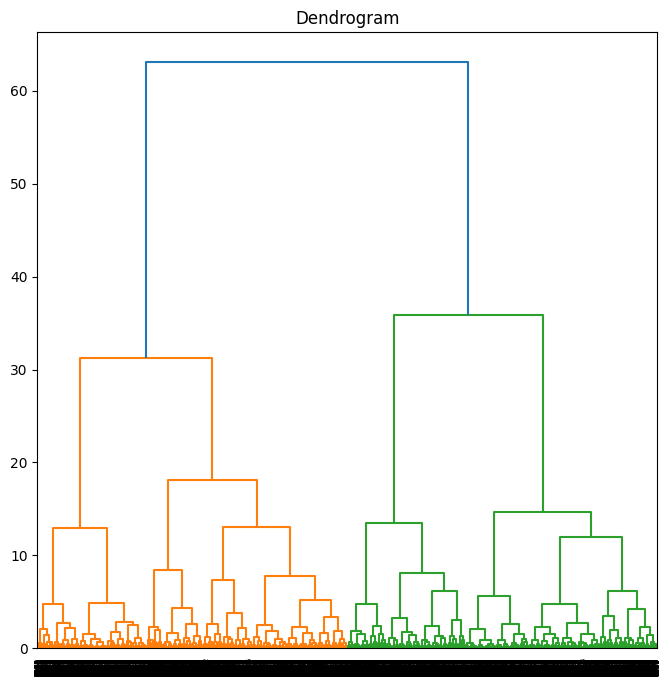

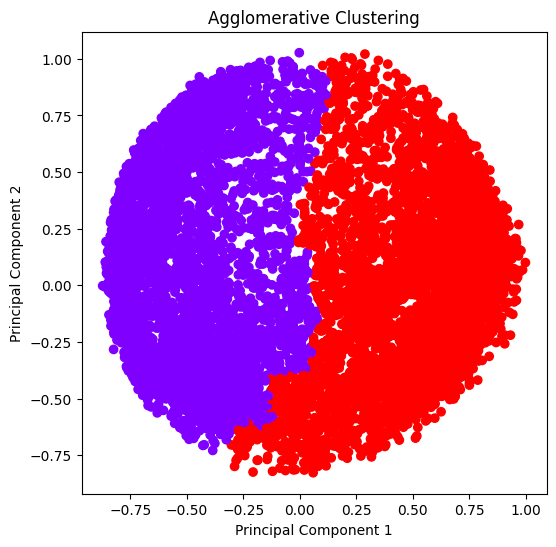

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
import scipy.cluster.hierarchy as shc

###################### DO NOT LOAD THIS DATA LINK DIRECTLY GO ON THIS LINK AND DOWNLOAD THE DATASET
url = 'https://raw.githubusercontent.com/RAHULKASHYAP02/Credit-Card-Segmentation/master/CC%20GENERAL.csv'
###################### DO NOT LOAD THIS DATA LINK DIRECTLY GO ON THIS LINK AND DOWNLOAD THE DATASET

X = pd.read_csv(url)

# Drop the 'CUST_ID' column from the data
X = X.drop('CUST_ID', axis=1)

# Handle missing values by forward filling
X.fillna(method='ffill', inplace=True)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Normalize the data
X_normalized = normalize(X_scaled)

# Convert the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)

# Perform PCA to reduce dimensionality
pca = PCA(n_components=2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

# Visualize the data using a dendrogram
plt.figure(figsize=(8, 8))
plt.title('Dendrogram')
dendrogram = shc.dendrogram(shc.linkage(X_principal, method='ward'))

# Implement Agglomerative Clustering with 2 clusters
ac2 = AgglomerativeClustering(n_clusters=2)

# Visualize the clusters using a scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'], c=ac2.fit_predict(X_principal), cmap='rainbow')
plt.title('Agglomerative Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


# 5. Implement Page Rank Algorithm. (Use python or beautiful soup for implementation).

In [ ]:
import requests
from bs4 import BeautifulSoup
import networkx as nx
import pandas as pd

def get_links_from_wikipedia(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    links = []
    for link in soup.find_all('a', href=True):
        href = link.get('href')
        if href.startswith('/wiki/') and ':' not in href:
            links.append(href)
    return links

def build_wikipedia_graph(start_url, max_depth, max_pages):
    G = nx.DiGraph()
    to_visit = [(start_url, 0)]
    visited = set()

    while to_visit:
        current_url, depth = to_visit.pop(0)

        if current_url not in visited and depth < max_depth:
            links = get_links_from_wikipedia("https://en.wikipedia.org" + current_url)
            visited.add(current_url)

            for link in links[:max_pages]:
                G.add_edge(current_url, link)
                to_visit.append((link, depth + 1))

    return G

def calculate_pagerank(graph):
    return nx.pagerank(graph)

start_url = "/wiki/PageRank"
max_depth = 2
max_pages = 10

graph = build_wikipedia_graph(start_url, max_depth, max_pages)
pagerank = calculate_pagerank(graph)

result_df = pd.DataFrame(pagerank.items(), columns=['Page', 'PageRank Score'])
result_df = result_df.sort_values(by='PageRank Score', ascending=False)

result_df


,Page,PageRank Score
1,/wiki/Main_Page,0.049815
3,/wiki/Google_Search,0.029284
11,/wiki/Smoking_on_My_Ex_Pack,0.029141
7,/wiki/Wikipedia,0.029141
8,/wiki/Free_content,0.029141
9,/wiki/Encyclopedia,0.029141
10,/wiki/English_language,0.029141
2,/wiki/Algorithm,0.028609
5,/wiki/Search_engine,0.028609
6,/wiki/Larry_Page,0.028609


# Bioinformatics

## 1. DNA Sequence Analysis. Task: Analyze a given DNA sequence and perform basic sequence manipulation, including nding motifs, calculating GC content, and identifying coding regions

In [ ]:
import re

# Function to find motifs in a DNA sequence
def find_motifs(sequence, motif):
    matches = re.finditer(motif, sequence)
    positions = [match.start() for match in matches]
    return positions

# Function to calculate GC content in a DNA sequence
def calculate_gc_content(sequence):
    gc_count = sequence.count('G') + sequence.count('C')
    total_bases = len(sequence)
    gc_content = (gc_count / total_bases) * 100
    return gc_content

# Function to identify coding regions (example: start codon 'ATG' and stop codon 'TAA')
def identify_coding_regions(sequence):
    start_codon = 'ATG'
    stop_codon = 'TAA'
    coding_regions = []
    start_positions = find_motifs(sequence, start_codon)
    stop_positions = find_motifs(sequence, stop_codon)

    for start in start_positions:
        for stop in stop_positions:
            if stop > start and (stop - start) % 3 == 0:
                coding_regions.append((start, stop + 2))

    return coding_regions


# Example DNA sequence (replace with your own sequence)
dna_sequence = "ATGGCCTAAATGGGCTAA"

# Find motifs
motif_to_find = "ATG"
motifs_found = find_motifs(dna_sequence, motif_to_find)
print(f"Motifs found: {motifs_found}")

# Calculate GC content
gc_content = calculate_gc_content(dna_sequence)
print(f"GC content: {gc_content}%")

# Identify coding regions
coding_regions = identify_coding_regions(dna_sequence)
print(f"Coding regions: {coding_regions}")


Motifs found: [0, 9]
GC content: 44.44444444444444%
Coding regions: [(0, 8), (0, 17), (9, 17)]


## OR

In [ ]:
import re

def find_motifs(sequence, motif):
  """Finds all occurrences of a given motif in a DNA sequence.

  Args:
    sequence: A string representing the DNA sequence.
    motif: A string representing the motif to search for.

  Returns:
    A list of all start positions of the motif in the sequence.
  """

  matches = []
  for i in range(len(sequence) - len(motif) + 1):
    if sequence[i:i + len(motif)] == motif:
      matches.append(i)
  return matches

def calculate_gc_content(sequence):
  """Calculates the GC content of a DNA sequence.

  Args:
    sequence: A string representing the DNA sequence.

  Returns:
    The GC content of the sequence as a float.
  """

  gc_count = 0
  for base in sequence:
    if base == "g" or base == "c":
      gc_count += 1
  return gc_count / float(len(sequence))

def identify_coding_regions(sequence):
  """Identifies the coding regions of a DNA sequence.

  Args:
    sequence: A string representing the DNA sequence.

  Returns:
    A list of all start and end positions of the coding regions in the sequence.
  """

  coding_regions = []
  for i in range(0, len(sequence), 3):
    codon = sequence[i:i + 3]
    if codon not in ["tga", "taa", "tag"]:
      coding_regions.append((i, i + 3))
  return coding_regions

def main():
  """Analyzes a given DNA sequence and performs basic sequence manipulation."""

  # Get the DNA sequence from the user.
  sequence = input("Enter a DNA sequence: ")

  # Find the motifs in the sequence.
  motifs = find_motifs(sequence, "tat")

  # Calculate the GC content of the sequence.
  gc_content = calculate_gc_content(sequence)

  # Identify the coding regions of the sequence.
  coding_regions = identify_coding_regions(sequence)

  # Print the results to the console.
  print("Motifs found:", motifs)
  print("GC content:", gc_content)
  print("Coding regions:", coding_regions)

if __name__ == "__main__":
  main()


## 4. Machine Learning for Genomic Data. Task: Apply machine learning algorithms, such as random forests or support vector machines, to classify genomic data based on speci c features or markers

In [ ]:
!pip install genomic-benchmarks

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 21.3 MB/s eta 0:00:00
  Created wheel for genomic-benchmarks: filename=genomic_benchmarks-0.0.9-py3-none-any.whl size=22506 sha256=5d475bda61e310836c0654275f84d63f6f283580bb7829565324935289ed538a
  Stored in directory: /root/.cache/pip/wheels/86/78/72/de9d75be800b6d679b8814b9663b3f610c34188b443b8b9b77
Successfully built genomic-benchmarks


Dataset `human_nontata_promoters` has 2 classes: negative, positive.

All lengths of genomic intervals equals 251.

Totally 36131 sequences have been found, 27097 for training and 9034 for testing.


Downloading...
From: https://drive.google.com/uc?id=1VdUg0Zu8yfLS6QesBXwGz1PIQrTW3Ze4
To: /root/.genomic_benchmarks/human_nontata_promoters.zip
100%|██████████| 11.8M/11.8M [00:00<00:00, 23.7MB/s]


Accuracy: 0.8110471551914988
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.79      0.79      4119
           1       0.82      0.83      0.83      4915

    accuracy                           0.81      9034
   macro avg       0.81      0.81      0.81      9034
weighted avg       0.81      0.81      0.81      9034



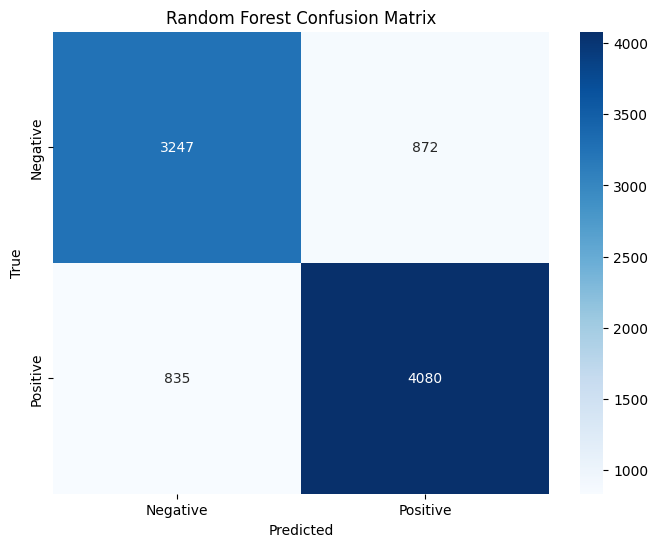

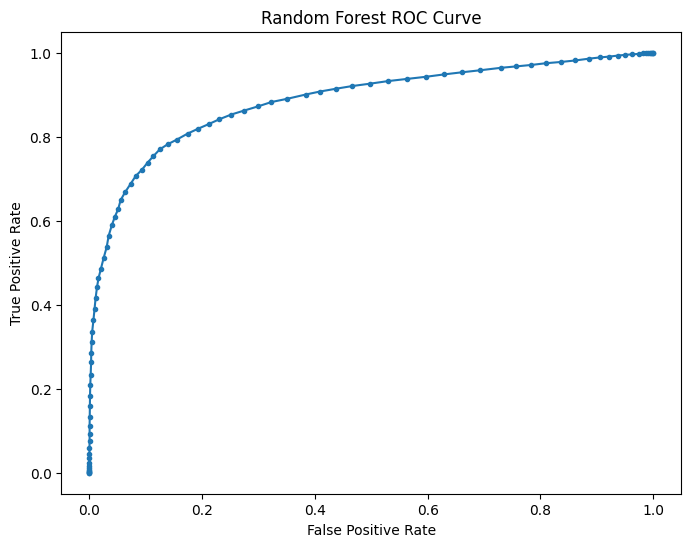

In [ ]:
# List available datasets
from genomic_benchmarks.data_check import list_datasets

list_datasets()

# Display information about the "human_nontata_promoters" dataset with version 0
from genomic_benchmarks.data_check import info

info("human_nontata_promoters", version=0)

# Load the "human_nontata_promoters" dataset for training and testing
from genomic_benchmarks.dataset_getters.pytorch_datasets import HumanNontataPromoters

train = HumanNontataPromoters(split='train', version=0)
test = HumanNontataPromoters(split='test', version=0)

# Access a specific example from the training dataset (e.g., the 3000th sample)
train[3000]

import numpy as np

# Define a mapping of DNA bases to one-hot encoding
base_to_index = {'A': 0, 'C': 1, 'G': 2, 'T': 3}

# Function to one-hot encode a DNA sequence, treating 'N' as missing data
def one_hot_encode(sequence, seq_length):
    encoded_sequence = np.zeros((seq_length, 4), dtype=int)
    for i, base in enumerate(sequence):
        if base in base_to_index:
            # Set the corresponding index to 1 for valid bases (A, C, G, T)
            encoded_sequence[i, base_to_index[base]] = 1
        else:
            # Treat 'N' as missing data (all zeros)
            encoded_sequence[i, :] = 0
    return encoded_sequence

# Apply one-hot encoding to the entire training and testing datasets
train_encoded = [one_hot_encode(item[0], len(item[0])) for item in train]
test_encoded = [one_hot_encode(item[0], len(item[0])) for item in test]

# Access the one-hot encoded sequence of the first sample in the training dataset
train_encoded[0]

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Extract labels from the training and testing datasets
train_labels = [item[1] for item in train]
test_labels = [item[1] for item in test]

# Reshape the one-hot encoded sequences into a two-dimensional format
train_encoded = np.array(train_encoded).reshape(len(train_encoded), -1)
test_encoded = np.array(test_encoded).reshape(len(test_encoded), -1)

# 2. Choose an Algorithm (Random Forest)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# 3. Training the Model
rf_classifier.fit(train_encoded, train_labels)

# 4. Model Evaluation
predictions = rf_classifier.predict(test_encoded)
accuracy = accuracy_score(test_labels, predictions)
report = classification_report(test_labels, predictions)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create a confusion matrix for the Random Forest classifier
rf_cm = confusion_matrix(test_labels, predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest Confusion Matrix')
plt.show()


from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve for Random Forest
rf_probs = rf_classifier.predict_proba(test_encoded)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(test_labels, rf_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.show()
